**Notes**: Twitter has permanently suspended the account @realDonaldTrump on 08 Jan 2021, so the last tweet captured in this dataset is on 08 Jan 2021.

In [85]:
import pandas as pd
import requests
from io import StringIO

# Getting the content of the file from the URL
url = 'https://raw.githubusercontent.com/MarkHershey/CompleteTrumpTweetsArchive/master/data/realDonaldTrump_in_office.csv'
response = requests.get(url)
file_content = StringIO(response.text)

# Reading the file content as a text file and processing each line manually to handle inconsistencies
lines = file_content.readlines()

# Processing the lines to extract columns
data = []
for line in lines[1:]:  # Skipping the header
    parts = line.split(',')
    if len(parts) >= 4:  # Making sure the line has enough parts to extract information
        id_ = parts[0].strip()
        time = parts[1].strip()
        tweet_url = parts[2].strip()
        tweet_text = ','.join(parts[3:]).strip()  # Joining the remaining parts as tweet text
        data.append([id_, time, tweet_url, tweet_text])

# Creating a dataframe from the processed data
df = pd.DataFrame(data, columns=['ID', 'Time', 'Tweet URL', 'Tweet Text'])
df

,ID,Time,Tweet URL,Tweet Text
0,@realDonaldTrump,2017-01-20 06:31,https://twitter.com/realDonaldTrump/status/822...,"""It all begins today! I will see you at 11:00 ..."
1,@realDonaldTrump,2017-01-20 11:51,https://twitter.com/realDonaldTrump/status/822...,"""Today we are not merely transferring power fr..."
2,@realDonaldTrump,2017-01-20 11:51,https://twitter.com/realDonaldTrump/status/822...,"""power from Washington, D.C. and giving it bac..."
3,@realDonaldTrump,2017-01-20 11:52,https://twitter.com/realDonaldTrump/status/822...,"""What truly matters is not which party control..."
4,@realDonaldTrump,2017-01-20 11:53,https://twitter.com/realDonaldTrump/status/822...,"""January 20th 2017, will be remembered as the ..."
...,...,...,...,...
23070,@realDonaldTrump,2021-01-07 04:13,https://twitter.com/realDonaldTrump/status/134...,"""I am asking for everyone at the U.S. Capitol ..."
23071,@realDonaldTrump,2021-01-07 05:17,https://twitter.com/realDonaldTrump/status/134...,"""https://t.co/Pm2PKV0Fp3"""
23072,@realDonaldTrump,2021-01-08 08:10,https://twitter.com/realDonaldTrump/status/134...,"""https://t.co/csX07ZVWGe"""
23073,@realDonaldTrump,2021-01-08 22:46,https://twitter.com/realDonaldTrump/status/134...,"""The 75,000,000 great American Patriots who vo..."


In [152]:
filtered_df = df[df['Tweet Text'].str.contains('virus|pandemic|covid', case=False, na=False)]
filtered_df

,ID,Time,Tweet URL,Tweet Text
9299,@realDonaldTrump,2019-08-03 20:09,https://twitter.com/realDonaldTrump/status/115...,"""RT @Franklin_Graham: 5 yrs ago today Dr. Kent..."
13736,@realDonaldTrump,2020-01-24 15:18,https://twitter.com/realDonaldTrump/status/122...,"""China has been working very hard to contain t..."
13891,@realDonaldTrump,2020-01-27 22:56,https://twitter.com/realDonaldTrump/status/122...,"""We are in very close communication with China..."
13902,@realDonaldTrump,2020-01-28 11:42,https://twitter.com/realDonaldTrump/status/122...,"""RT @SenateForeign: Today I was briefed by lea..."
13940,@realDonaldTrump,2020-01-29 03:11,https://twitter.com/realDonaldTrump/status/122...,"""RT @OANN: Johnson &amp; Johnson to create cor..."
...,...,...,...,...
22888,@realDonaldTrump,2020-12-28 07:21,https://twitter.com/realDonaldTrump/status/134...,"""Good news on Covid Relief Bill. Information t..."
22899,@realDonaldTrump,2020-12-29 14:47,https://twitter.com/realDonaldTrump/status/134...,"""RT @SenatorBraun: I want to thank Pres. Trump..."
22904,@realDonaldTrump,2020-12-29 21:46,https://twitter.com/realDonaldTrump/status/134...,"""$2000 for our great people, not $600! They ha..."
22947,@realDonaldTrump,2021-01-02 04:56,https://twitter.com/realDonaldTrump/status/134...,"""Our Republican Senate just missed the opportu..."


In [155]:
china_fd_keywords = ['wuhan virus']
china_fd = filtered_df_2020_2021[filtered_df_2020_2021['Tweet Text']
                                        .str.contains('|'.join(china_fd_keywords), case=False, na=False)]
china_fd

,Time,ID,Tweet URL,Tweet Text
97,2020-03-14 11:58:00,@realDonaldTrump,https://twitter.com/realDonaldTrump/status/123...,"""RT @AndrewHClark: Oh no! CNN's reporter just ..."
371,2020-04-27 09:11:00,@realDonaldTrump,https://twitter.com/realDonaldTrump/status/125...,"""RT @dbongino: Here’s what serial fraudster, &..."


In [87]:
weeks_range = pd.date_range(start='2020-01-05', end='2021-01-03', freq='W-Sun')

In [88]:
from datetime import datetime, timedelta

# Converting the 'Time' column to datetime objects
filtered_df['Time'] = pd.to_datetime(filtered_df['Time'], errors='coerce')

# Further filtering the tweets to only include those between 2020-01-05 and 2021-01-02
start_date = datetime.strptime('2020-01-05', '%Y-%m-%d')
end_date = datetime.strptime('2021-01-02', '%Y-%m-%d')
filtered_df_2020_2021 = filtered_df[(filtered_df['Time'] >= start_date) & (filtered_df['Time'] <= end_date)]

# Counting the number of tweets each week
filtered_df_2020_2021.set_index('Time', inplace=True)
weekly_counts = filtered_df_2020_2021.resample('W-Sun').size()

# Resetting the index of the dataframe
filtered_df_2020_2021.reset_index(inplace=True)

weekly_counts = weekly_counts.reindex(weeks_range, fill_value=0)
weekly_counts
len(filtered_df_2020_2021)

/var/folders/vh/bnk8gjpn5998vq44hzdttvwc0000gn/T/ipykernel_90954/239518753.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Time'] = pd.to_datetime(filtered_df['Time'], errors='coerce')


632

In [123]:
weekly_counts = weekly_counts.rename(columns={0: 'weekly_counts'})
weekly_counts.head()

,week,weekly_counts
0,2020-01-05,0
1,2020-01-12,0
2,2020-01-19,0
3,2020-01-26,1
4,2020-02-02,6


In [89]:
filtered_df_2020_2021 = filtered_df_2020_2021.drop_duplicates(subset='Tweet Text')

In [105]:
type(filtered_df_2020_2021)

pandas.core.frame.DataFrame

In [107]:
# Filtering the tweets to include only those that contain China-related keywords
china_pre_keywords = ['china', 'chinese', 'wuhan', 'beijing', 'ccp', 'xi', 'communist', 'prc', 'communism']
china_filtered_pre_df = filtered_df_2020_2021[filtered_df_2020_2021['Tweet Text']
                                        .str.contains('|'.join(china_pre_keywords), case=False, na=False)]

# Counting the number of China-related tweets each week
china_filtered_pre_df['Time'] = pd.to_datetime(china_filtered_pre_df['Time'])  # Convert 'Time' to datetime
china_filtered_pre_df.set_index('Time', inplace=True)
china_weekly_pre_counts = china_filtered_pre_df.resample('W-Sun').size()

# Resetting the index of the dataframe
china_filtered_pre_df.reset_index(inplace=True)

# Displaying the weekly counts of China-related tweets
china_weekly_pre_counts = china_weekly_pre_counts.reindex(weeks_range, fill_value=0)
china_weekly_pre_counts.sum()

/var/folders/vh/bnk8gjpn5998vq44hzdttvwc0000gn/T/ipykernel_90954/3175966399.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  china_filtered_pre_df['Time'] = pd.to_datetime(china_filtered_pre_df['Time'])  # Convert 'Time' to datetime


113

In [120]:
china_weekly_pre_counts = china_weekly_pre_counts.to_frame().reset_index().rename(columns = {'index':'week'})
china_weekly_pre_counts = china_weekly_pre_counts.rename(columns={0: 'china_weekly_pre_counts'})
china_weekly_pre_counts.head()

,week,china_weekly_pre_counts
0,2020-01-05,0
1,2020-01-12,0
2,2020-01-19,0
3,2020-01-26,1
4,2020-02-02,5


In [162]:
# Filtering the tweets to include only those that contain China-related keywords
china_keywords = ['china virus', 'chinese virus', 'wuhan virus', 'beijing', 'ccp', 'xi', 'communist', 'prc', 'communism']
china_filtered_df = filtered_df_2020_2021[filtered_df_2020_2021['Tweet Text']
                                        .str.contains('|'.join(china_keywords), case=False, na=False)]

# Counting the number of China-related tweets each week
china_filtered_df.set_index('Time', inplace=True)
china_weekly_counts = china_filtered_df.resample('W-Sun').size()

# Resetting the index of the dataframe
china_filtered_df.reset_index(inplace=True)

# Displaying the weekly counts of China-related tweets
china_weekly_counts = china_weekly_counts.reindex(weeks_range, fill_value=0)
sum(china_weekly_counts)

71

In [163]:
china_weekly_counts = china_weekly_counts.to_frame().reset_index().rename(columns = {'index':'week'})
china_weekly_counts = china_weekly_counts.rename(columns={0: 'china_weekly_counts'})
china_weekly_counts.head()

,week,china_weekly_counts
0,2020-01-05,0
1,2020-01-12,0
2,2020-01-19,0
3,2020-01-26,1
4,2020-02-02,1


In [164]:
# Filtering the tweets to include only those that contain xenophobic keywords
xenophobic_keywords = ['china virus', 'chinese virus', 'wuhan virus', 'kung flu']
xenophobic_df = filtered_df_2020_2021[filtered_df_2020_2021['Tweet Text']
                                     .str.contains('|'.join(xenophobic_keywords), case=False, na=False)]

# Counting the number of xenophobic tweets each week
xenophobic_df.set_index('Time', inplace=True)
xenophobic_weekly_counts = xenophobic_df.resample('W-Sun').size()

# Displaying the weekly counts of xenophobic tweets
xenophobic_weekly_counts = xenophobic_weekly_counts.reindex(weeks_range, fill_value=0)
xenophobic_weekly_counts.sum()

47

In [165]:
xenophobic_weekly_counts = xenophobic_weekly_counts.to_frame().reset_index().rename(columns={'index': 'week', 0: 'xenophobic_weekly_counts'})
xenophobic_weekly_counts.head()

,week,xenophobic_weekly_counts
0,2020-01-05,0
1,2020-01-12,0
2,2020-01-19,0
3,2020-01-26,0
4,2020-02-02,0


In [127]:
combined_weekly_counts = weekly_counts.merge(china_weekly_pre_counts, on='week', how='left')
combined_weekly_counts = combined_weekly_counts.merge(china_weekly_counts, on='week', how='left')
combined_weekly_counts = combined_weekly_counts.merge(xenophobic_weekly_counts, on='week', how='left')

In [128]:
combined_weekly_counts.head()

,week,weekly_counts,china_weekly_pre_counts,china_weekly_counts,xenophobic_weekly_counts
0,2020-01-05,0,0,0,0
1,2020-01-12,0,0,0,0
2,2020-01-19,0,0,0,0
3,2020-01-26,1,1,1,0
4,2020-02-02,6,5,1,0


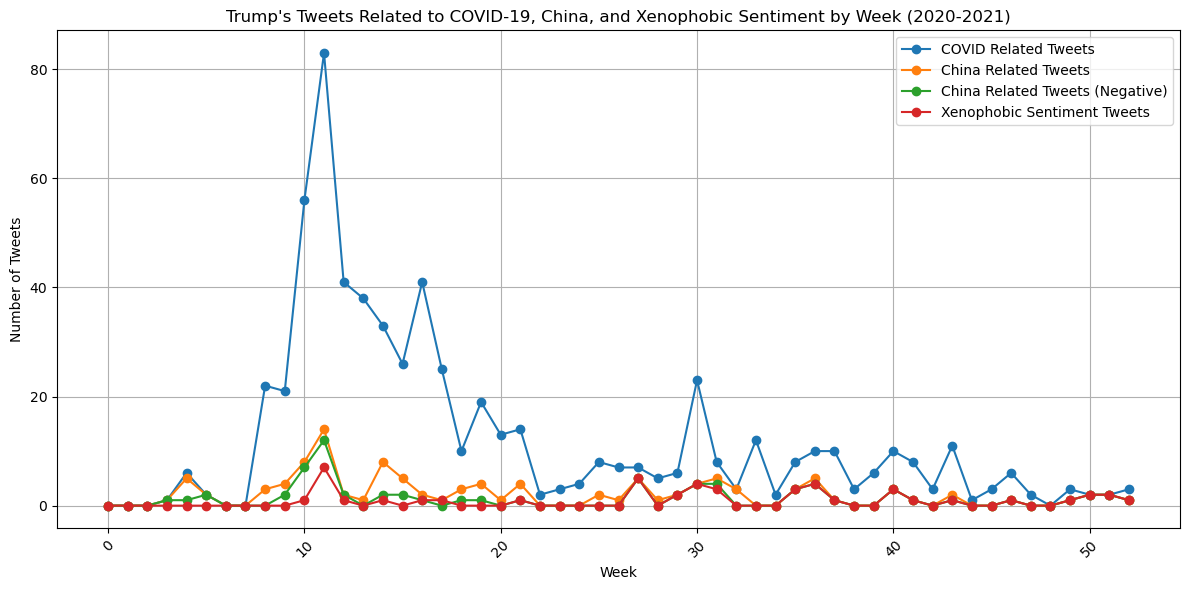

In [131]:
import matplotlib.pyplot as plt

# Creating the visualization
plt.figure(figsize=(12, 6))
plt.plot(combined_weekly_counts.index, combined_weekly_counts['weekly_counts'], label='COVID Related Tweets', marker='o')
plt.plot(combined_weekly_counts.index, combined_weekly_counts['china_weekly_pre_counts'], label='China Related Tweets', marker='o')
plt.plot(combined_weekly_counts.index, combined_weekly_counts['china_weekly_counts'], label='China Related Tweets (Negative)', marker='o')
plt.plot(combined_weekly_counts.index, combined_weekly_counts['xenophobic_weekly_counts'], label='Xenophobic Sentiment Tweets', marker='o')

# Adding labels and title
plt.xlabel('Week')
plt.ylabel('Number of Tweets')
plt.title('Trump\'s Tweets Related to COVID-19, China, and Xenophobic Sentiment by Week (2020-2021)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Displaying the visualization
plt.show()


In [132]:
# Loading the Google Trends data
google_trends_path = '/Users/jinwens/Desktop/google_trend.xlsx'
google_trends_df = pd.read_excel(google_trends_path)

google_trends_df.head()

,week,china,china_virus,chinese_virus,wuhan_virus,china_youtube,china_virus_youtube,chinese_virus_youtube,wuhan_virus_youtube
0,2020-01-05,30,1,1,0,43,0,0,0
1,2020-01-12,32,3,2,1,50,1,0,0
2,2020-01-19,59,100,55,72,69,50,12,50
3,2020-01-26,70,92,43,100,90,90,25,100
4,2020-02-02,53,39,19,37,75,64,11,35


In [156]:
merged_df_ivdv = combined_weekly_counts.merge(google_trends_df, on = 'week')
merged_df_ivdv

,week,weekly_counts,china_weekly_pre_counts,china_weekly_counts,xenophobic_weekly_counts,china,china_virus,chinese_virus,wuhan_virus,china_youtube,china_virus_youtube,chinese_virus_youtube,wuhan_virus_youtube
0,2020-01-05,0,0,0,0,30,1,1,0,43,0,0,0
1,2020-01-12,0,0,0,0,32,3,2,1,50,1,0,0
2,2020-01-19,0,0,0,0,59,100,55,72,69,50,12,50
3,2020-01-26,1,1,1,0,70,92,43,100,90,90,25,100
4,2020-02-02,6,5,1,0,53,39,19,37,75,64,11,35
5,2020-02-09,2,2,2,0,47,31,13,25,69,59,10,23
6,2020-02-16,0,0,0,0,40,19,10,14,59,27,6,11
7,2020-02-23,0,0,0,0,48,27,15,17,63,37,6,10
8,2020-03-01,22,3,0,0,51,29,15,14,62,37,15,11
9,2020-03-08,21,4,2,0,69,52,22,29,77,55,14,16


In [157]:
merged_df_ivdv.to_csv('merged_data_ivdv.csv', index=False)

In [158]:
merged_df_ivdv['weekly_counts'].sum()

629

In [159]:
merged_df_ivdv['china_weekly_pre_counts'].sum()

112

In [160]:
merged_df_ivdv['china_weekly_counts'].sum()

69

In [161]:
merged_df_ivdv['xenophobic_weekly_counts'].sum()

46